##中心極限定理の意味  


中心極限定理について次のように説明されています。

自然現象や社会現象の中には、確率密度関数のグラフが右図のように、ある値を中心に対称的に分布し、中心から離れるほど度数が少なくなる鐘形の曲線に近づく場合が多いです。



ここでいう「右図」は一般的な正規分布の形を描いたグラフです。

なぜこのような現象が起こるのかについて、もう少し詳しく説明されていれば良かったと思うことがよくあります。

さらに、以下のように正規分布の式が複雑であるため、初めて学ぶ立場からすると抵抗感を覚えることもあるでしょう。

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right) $$  

中心極限定理の重要なキーワードは「平均」  
中心極限定理を理解するためには、標本の平均を抽出する過程についてよく理解する必要があります。



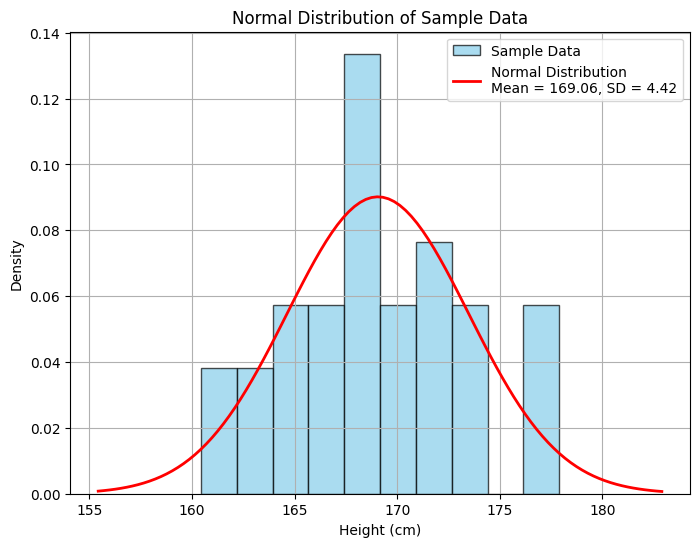

In [12]:
# Plotting the normal distribution of the sample data used earlier.

# Creating the histogram of the sample data to show the normal distribution
plt.figure(figsize=(8, 6))

# Plotting the histogram of the data with a fitted normal distribution curve
plt.hist(sample_data, bins=10, color='skyblue', alpha=0.7, edgecolor='black', density=True, label='Sample Data')

# Calculating the mean and standard deviation of the sample data
mean = np.mean(sample_data)
std = np.std(sample_data)

# Generating a range of x values from the minimum to the maximum of the sample data
x = np.linspace(min(sample_data) - 5, max(sample_data) + 5, 100)

# Calculating the normal distribution curve using the mean and standard deviation of the data
y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)

# Plotting the normal distribution curve
plt.plot(x, y, color='red', linewidth=2, label=f'Normal Distribution\nMean = {mean:.2f}, SD = {std:.2f}')

plt.title('Normal Distribution of Sample Data')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


母集団から標本を抽出する過程をよく考えてみましょう。



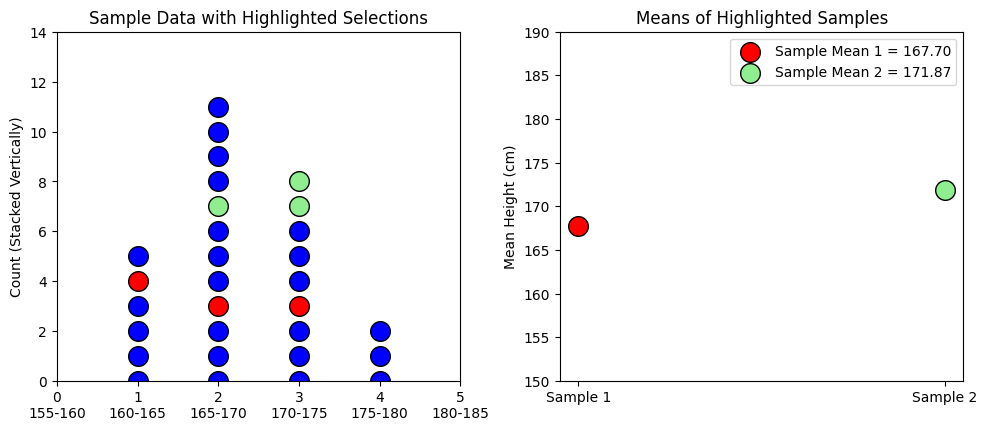

In [15]:
# Re-import necessary libraries and redefine the required functions and variables for the correct execution.

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random

# Re-generating sample data
np.random.seed(42)  # Ensuring reproducibility
sample_data = np.random.normal(loc=170, scale=5, size=30)

# Defining the intervals
intervals = [(155, 160), (160, 165), (165, 170), (170, 175), (175, 180), (180, 185)]

# Function to categorize data into intervals
def categorize_data(data, intervals):
    categorized_data = {f"{start}-{end}": [] for start, end in intervals}
    for value in data:
        for start, end in intervals:
            if start <= value < end:
                categorized_data[f"{start}-{end}"].append(value)
                break
    return categorized_data

# Categorizing the sample data
categorized_data = categorize_data(sample_data, intervals)

# Function to plot stacked circles without gaps
def plot_intervals_and_means(data, ax1, ax2, color1, color2):
    max_heights = []
    highlighted_samples1 = random.sample([value for values in data.values() for value in values], 3)
    highlighted_samples2 = random.sample([value for values in data.values() for value in values], 3)

    # Plotting the first set of highlighted samples in different colors on the left graph
    for i, (interval, values) in enumerate(data.items()):
        count = 0
        for value in sorted(values):
            if value in highlighted_samples1:
                ax1.scatter(i, count, color=color1, s=200, edgecolors='black', zorder=2)
            elif value in highlighted_samples2:
                ax1.scatter(i, count, color=color2, s=200, edgecolors='black', zorder=2)
            else:
                ax1.scatter(i, count, color='blue', s=200, edgecolors='black', zorder=2)
            count += 1
        max_heights.append(count)
        ax1.text(i, -1, interval, ha='center', va='top')

    # Calculating means of the selected samples and plotting them on the right graph
    mean1 = np.mean(highlighted_samples1)
    mean2 = np.mean(highlighted_samples2)
    ax2.scatter(0, mean1, color=color1, s=200, edgecolors='black', zorder=2, label=f'Sample Mean 1 = {mean1:.2f}')
    ax2.scatter(1, mean2, color=color2, s=200, edgecolors='black', zorder=2, label=f'Sample Mean 2 = {mean2:.2f}')

    # Setting labels and limits for the right graph
    ax2.set_xticks([0, 1])
    ax2.set_xticklabels(['Sample 1', 'Sample 2'])
    ax2.set_ylabel('Mean Height (cm)')
    ax2.set_ylim(150, 190)
    ax2.legend()

    return max(max_heights) if max_heights else 0

# Creating the figure with side-by-side subplots
plt.figure(figsize=(10, 8))

# Plotting the intervals with individual stacked circles and highlighted samples on the left side
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
max_height1 = plot_intervals_and_means(categorized_data, ax1, ax2, 'red', 'lightgreen')
ax1.set_title('Sample Data with Highlighted Selections')
#ax1.set_xlabel('Intervals')
ax1.set_ylabel('Count (Stacked Vertically)')
ax1.set_xticks(range(len(intervals)))
#ax1.set_xticklabels([f"{start}-{end}" for start, end in intervals])
ax1.set_ylim(0, max_height1 + 2)

ax2.set_title('Means of Highlighted Samples')

plt.tight_layout()
plt.show()


図1. 母集団からサイズ3のサンプルを2回抽出し、それぞれの抽出時に平均を計算してヒストグラムで表現したもの

通常、母集団とは非常に大規模な集団の特性を確認するものですが、ここでは理解を助けるために非常に小さな母集団を考えてみます。

図1のように、3年1組の全生徒の身長という特性を持つ母集団を考えてみましょう。

ここでサンプルを抽出するということは、この30人の全生徒の中から一部を任意に（ランダムに）選ぶことを意味します。

また、サンプル抽出時に必要な過程としてサンプルのサイズを決めることがありますが、これは研究者が設定します。図1の場合、サンプルのサイズは3に設定されています。

図1の左側に見られるように、一度サンプルを抽出するたびに3人ずつランダムに選択されています。

また、各抽出されたサンプルの平均身長を計算し、図1の右側にヒストグラム形式で表示することができます。

例えば、青色で示されたデータの場合、3つの値が抽出され、164、166、168が得られたため、平均値は166です。

この平均値は図1の右側のヒストグラムに青色で示されています。

標本抽出を無数に行うとどうなるか？  
上記のセクションでは、標本抽出が2回だけ行われました。

しかし、標本抽出が2回ではなく無数に行われた場合、図1の右側で見たような標本平均の分布はどのような形になるのでしょうか？

結論から言うと、標本抽出が無数に行われると、標本平均の分布は正規分布に収束します。

（ここで注意すべき点は、標本のサイズが大きくなるほど（つまり、一度に多く抽出するほど）標本平均の分布が正規分布により近づくという点です。

標本抽出回数を100回に増やしたのは、モンテカルロ法で標本の分布を確認するためです。）

現実的には無限にサンプル抽出を行うことはできないため、サンプル抽出を100回実施してみましょう。



In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

from google.colab import drive
drive.mount('/content/drive')

# Generate sample data for the animation
np.random.seed(42)  # Ensuring reproducibility
sample_data = np.random.normal(loc=170, scale=5, size=300)  # Larger sample to better simulate repeated sampling

# Define the intervals
intervals = [(155, 160), (160, 165), (165, 170), (170, 175), (175, 180), (180, 185)]

# Function to categorize data into intervals
def categorize_data(data, intervals):
    categorized_data = {f"{start}-{end}": [] for start, end in intervals}
    for value in data:
        for start, end in intervals:
            if start <= value < end:
                categorized_data[f"{start}-{end}"].append(value)
                break
    return categorized_data

# Categorize the sample data
categorized_data = categorize_data(sample_data, intervals)

# Create the animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
means = []  # List to store the means of each sampling

# Initialization function to set up the plot
def init():
    ax1.clear()
    ax2.clear()
    ax1.set_title('Sample Data with Highlighted Selections')
    ax1.set_xlabel('Intervals')
    ax1.set_ylabel('Count (Stacked Vertically)')
    ax1.set_xticks(range(len(intervals)))
    ax1.set_xticklabels([f"{start}-{end}" for start, end in intervals])
    ax1.set_ylim(0, 20)

    ax2.set_title('Means of Highlighted Samples Forming a Normal Distribution')
    ax2.set_xlabel('Sample Mean')
    ax2.set_ylabel('Frequency')
    ax2.set_xlim(150, 190)
    ax2.set_ylim(0, 20)
    return ax1, ax2

# Update function to animate each frame
def update(frame):
    ax1.clear()
    ax2.clear()

    # Draw random samples and highlight them
    highlighted_samples = random.sample([value for values in categorized_data.values() for value in values], 3)
    for i, (interval, values) in enumerate(categorized_data.items()):
        count = 0
        for value in sorted(values):
            if value in highlighted_samples:
                ax1.scatter(i, count, color='red', s=200, edgecolors='black', zorder=2)
            else:
                ax1.scatter(i, count, color='blue', s=200, edgecolors='black', zorder=2)
            count += 1
        ax1.text(i, -1, interval, ha='center', va='top')

    # Calculate the mean of the highlighted samples
    mean = np.mean(highlighted_samples)
    means.append(mean)

    # Plot the histogram of the means
    ax2.hist(means, bins=10, color='skyblue', alpha=0.7, edgecolor='black')
    ax2.set_title('Means of Highlighted Samples Forming a Normal Distribution')
    ax2.set_xlabel('Sample Mean')
    ax2.set_ylabel('Frequency')
    ax2.set_xlim(150, 190)
    ax2.set_ylim(0, 20)
    return ax1, ax2

# Create the animation
ani = FuncAnimation(fig, update, frames=100, init_func=init, repeat=False, interval=200)

# Display the animation (this will work in a Jupyter notebook)
plt.close(fig)
# To display the animation, you would typically use:
# from IPython.display import HTML
# HTML(ani.to_jshtml())

# If you want to save the animation as a gif, you can use:
ani.save('/content/drive/MyDrive/Colab Notebooks/sampling_animation.gif', writer='pillow', fps=5)

Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


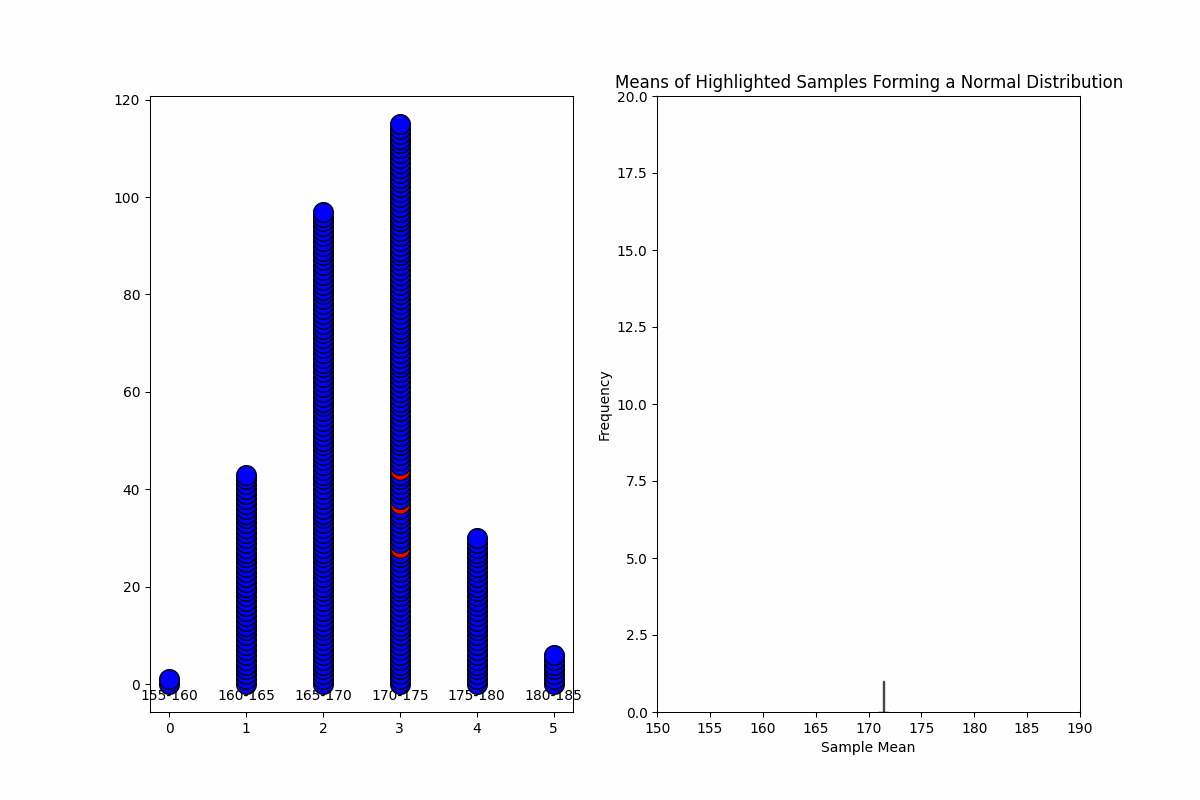

In [36]:
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/sampling_animation.gif')

図2. サイズ3の標本を100回抽出し、各抽出時に得られた標本の平均値をヒストグラム形式で表示したもの

母集団の形に関係なく中心極限定理は成立する  
一方、図1および図2では母集団の形が正規分布に似ていましたが、それが標本平均の分布が正規分布に従う理由なのでしょうか？

答えは「そうではない」です。

中心極限定理が強力である理由は、母集団の形がどうであれ関係なく、標本平均の分布が正規分布に従うという点にあります。

以下は、母集団が図1や図2とは全く異なる形の分布を持つ場合の標本平均のヒストグラムの例です。

以下の図3では、母集団の分布が一様分布に従う場合を仮定しました。



In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

from google.colab import drive
drive.mount('/content/drive')


# Generate sample data for the animation (uniform distribution)
np.random.seed(42)  # Ensuring reproducibility
sample_data = np.random.uniform(low=150, high=190, size=300)

# Define the intervals
intervals = [(150, 156.67), (156.67, 163.33), (163.33, 170), (170, 176.67), (176.67, 183.33), (183.33, 190)]

# Function to categorize data into intervals
def categorize_data(data, intervals):
    categorized_data = {f"{start:.2f}-{end:.2f}": [] for start, end in intervals}
    for value in data:
        for start, end in intervals:
            if start <= value < end:
                categorized_data[f"{start:.2f}-{end:.2f}"].append(value)
                break
    return categorized_data

# Categorize the sample data
categorized_data = categorize_data(sample_data, intervals)

# Create the animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
means = []  # List to store the means of each sampling

# Initialization function to set up the plot
def init():
    ax1.clear()
    ax2.clear()
    ax1.set_title('Uniform Sample Data with Highlighted Selections')
    ax1.set_xlabel('Intervals')
    ax1.set_ylabel('Count (Stacked Vertically)')
    ax1.set_xticks(range(len(intervals)))
    ax1.set_xticklabels([f"{start:.2f}-{end:.2f}" for start, end in intervals], rotation=45, ha='right')
    ax1.set_ylim(0, 20)

    ax2.set_title('Means of Highlighted Samples')
    ax2.set_xlabel('Sample Mean')
    ax2.set_ylabel('Frequency')
    ax2.set_xlim(150, 190)
    ax2.set_ylim(0, 20)
    return ax1, ax2

# Update function to animate each frame
def update(frame):
    ax1.clear()
    ax2.clear()

    # Draw random samples and highlight them
    highlighted_samples = random.sample([value for values in categorized_data.values() for value in values], 3)
    for i, (interval, values) in enumerate(categorized_data.items()):
        count = 0
        for value in sorted(values):
            if value in highlighted_samples:
                ax1.scatter(i, count, color='red', s=200, edgecolors='black', zorder=2)
            else:
                ax1.scatter(i, count, color='blue', s=200, edgecolors='black', zorder=2)
            count += 1
        ax1.text(i, -1, interval, ha='center', va='top', rotation=45)

    # Set up the first plot
    ax1.set_title('Uniform Sample Data with Highlighted Selections')
    ax1.set_xlabel('Intervals')
    ax1.set_ylabel('Count (Stacked Vertically)')
    ax1.set_xticks(range(len(intervals)))
    ax1.set_xticklabels([f"{start:.2f}-{end:.2f}" for start, end in intervals], rotation=45, ha='right')
    ax1.set_ylim(0, 20)

    # Calculate the mean of the highlighted samples
    mean = np.mean(highlighted_samples)
    means.append(mean)

    # Plot the histogram of the means
    ax2.hist(means, bins=10, color='skyblue', alpha=0.7, edgecolor='black')
    ax2.set_title('Means of Highlighted Samples')
    ax2.set_xlabel('Sample Mean')
    ax2.set_ylabel('Frequency')
    ax2.set_xlim(150, 190)
    ax2.set_ylim(0, 20)
    return ax1, ax2

# Create the animation
ani = FuncAnimation(fig, update, frames=100, init_func=init, repeat=False, interval=200)

# Display the animation (this will work in a Jupyter notebook)
plt.close(fig)
# To display the animation, you would typically use:
# from IPython.display import HTML
# HTML(ani.to_jshtml())

# If you want to save the animation as a gif, you can use:
ani.save('/content/drive/MyDrive/Colab Notebooks/uniform_sampling_animation.gif', writer='pillow', fps=5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


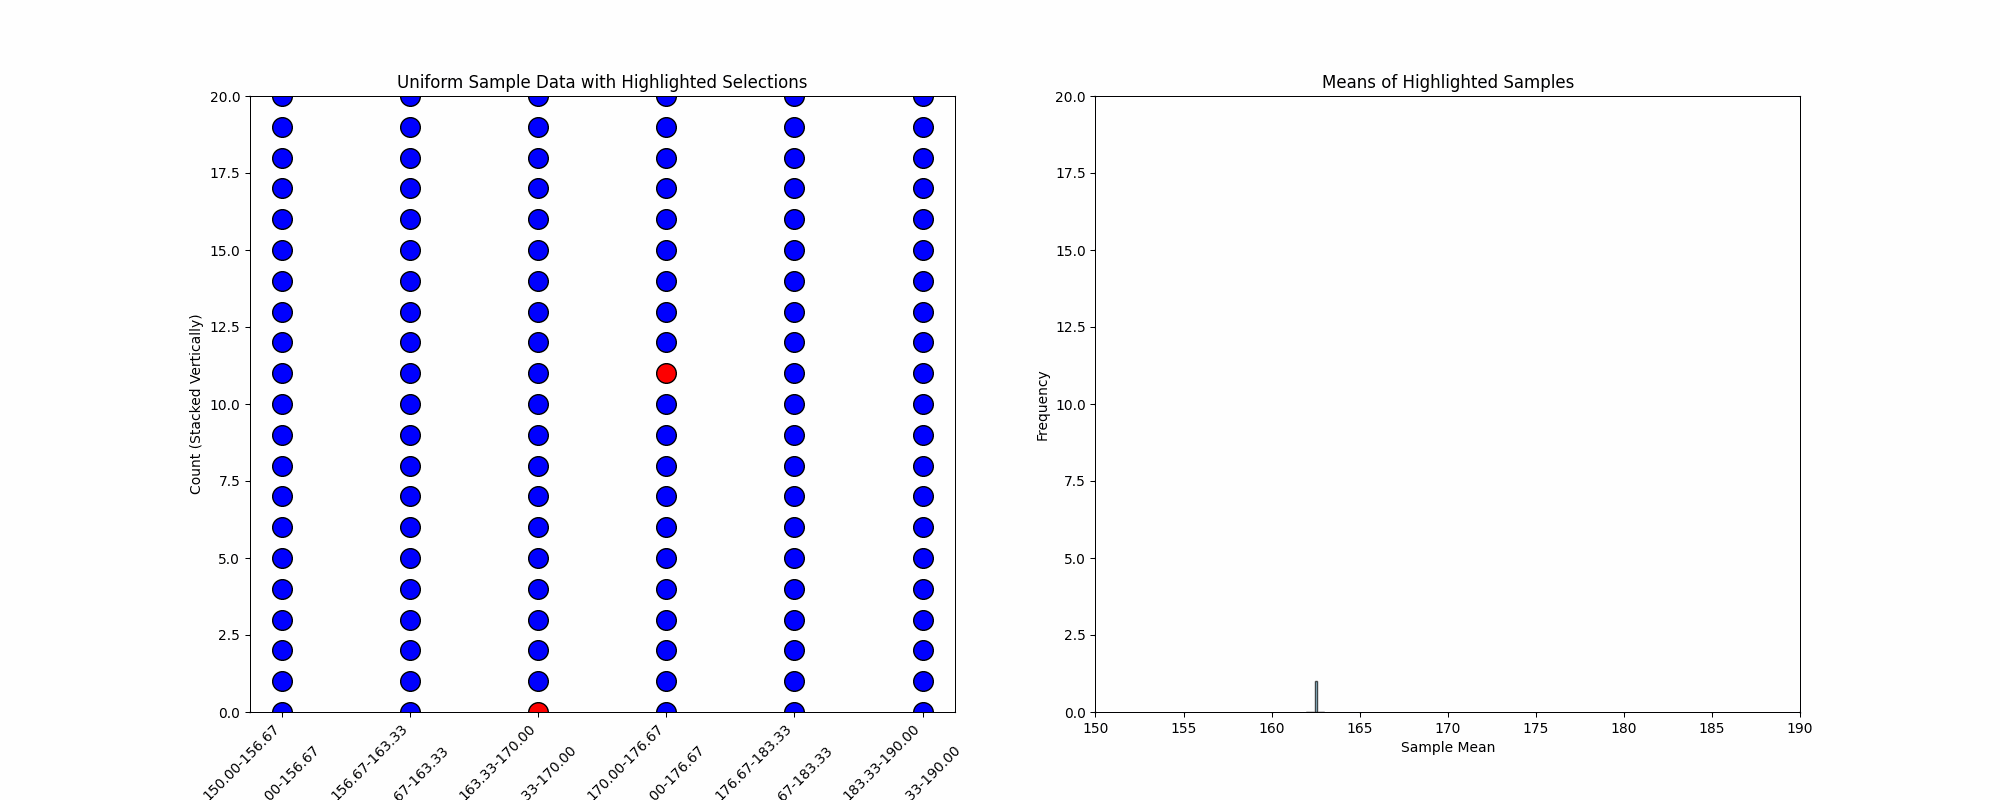

In [37]:
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/uniform_sampling_animation.gif')


図3. 母集団の分布が一様分布である場合、各回抽出された標本の平均値をヒストグラム形式で表示したもの



##まとめ  
学んだ内容をまとめると次のようになります。

- 標本平均の分布は正規分布に近似される。
- 母集団の形がどうであっても中心極限定理は成立する。
- たとえ標本を抽出する母集団が互いに独立していれば、複数の母集団から抽出された標本でも、標本平均の分布は正規分布に近似される。


では、最初に述べた自然現象や社会現象で鐘形の分布がよく見られる理由は何でしょうか？

おそらく、自然現象や社会現象は単独の特性だけで起こるのではなく、さまざまな特性が合わさって平均的な結果として現れるため、その現象はこのような鐘形の正規分布に従うのではないかと考えています。

さらに、私たちが中心極限定理に焦点を当てて統計学を学ぶ理由のもう一つは、一般的に標本を比較するときに平均についての比較を多く行うため、この現象に関連した中心極限定理を念頭に置いて得られた理論を多く学ぶことになるからです。